# Scikit-learn 배우기: 파이썬과 기계 학습

## 3장 : 비지도 학습 - 손글씨 숫자 군집화

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import pylab as pl

숫자 데이터셋을 임포트하고 일부를 보도록 한다.


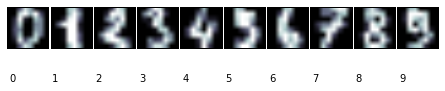

In [3]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)

def print_digits(images,y,max_n=10):
    # 인치로 그림 사이즈를 설정한다
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # 20x20 매트릭스 이미지를 도식한다
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # 목적값을 이미지에 적는다
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)


훈련 데이터와 테스트 데이터를 만든다.


n_digits: 10, 	 n_samples 1347, 	 n_features 64


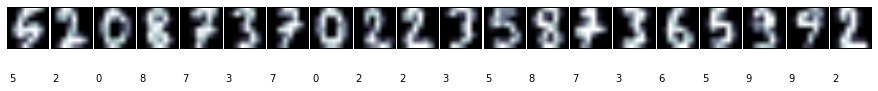

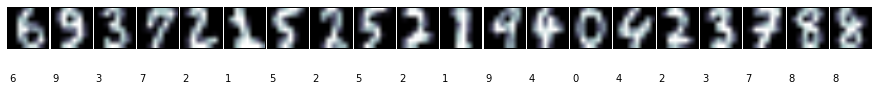

In [4]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images,  test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train


print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


## K평균(K-Means)

K평균 분류기를 훈련하고 군집(clusters)을 구한다.


(1347L,)
[3 2 0 6 8 6 2 3 3]


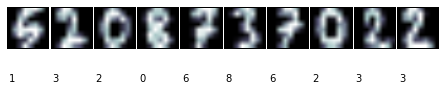

In [5]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)
print clf.labels_.shape
print clf.labels_[1:10]
print_digits(images_train, clf.labels_, max_n=10)


군집을 예측한다.

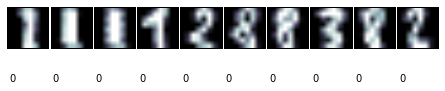

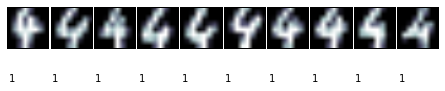

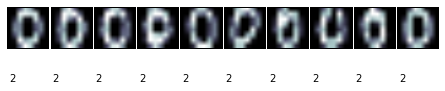

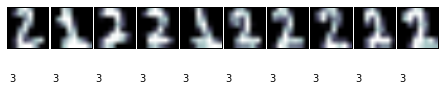

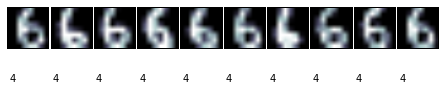

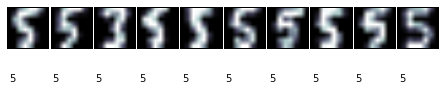

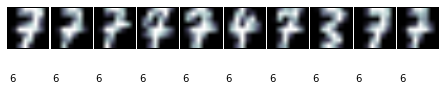

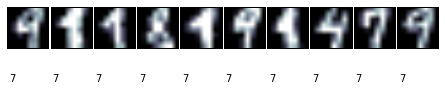

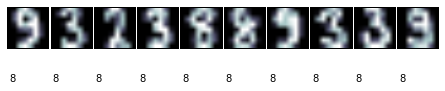

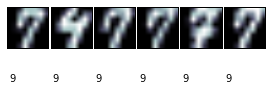

In [6]:
# 테스트 데이터로 군집을 예측한다
y_pred = clf.predict(X_test)

def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

for i in range(10):
     print_cluster(images_test, y_pred, i)


성능 메트릭(metrics)을 보며 (알고 있는 숫자 범주을 사용하여) 본래의 군집과 비교한다.


In [7]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:0.57
Homogeneity score:0.69 
Completeness score: 0.73 
Confusion matrix
[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


군집과 중앙점을 살펴본다([the scikit-learn tutorial](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)을 참고함).


C:\Users\chulw\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


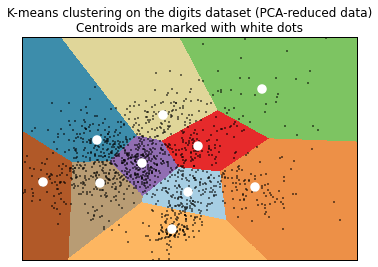

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
h = .01     # mesh [x_min, m_max]x[y_min, y_max]내의 점

# 결정 경계를 그린다. 각 영역을 색을 부여한다
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# 결과를 색으로 출력한다
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# 중심점을 흰 색으로 그린다
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         'Centroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 어피니티 프라퍼게이션(Affinity Propagation)

어피니티 프라퍼게이션을 사용한다.


In [9]:
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print aff.cluster_centers_indices_.shape




(112L,)


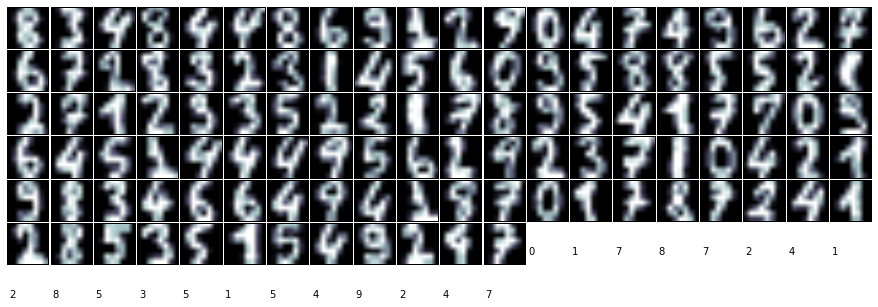

In [10]:
print_digits(images_train[aff.cluster_centers_indices_], y_train[aff.cluster_centers_indices_], max_n=aff.cluster_centers_indices_.shape[0])

다른 군집화 기법인 평균 이동(Mean Shift)으로 시도한다.


In [11]:
ms = cluster.MeanShift()
ms.fit(X_train)
print ms.cluster_centers_

[[ 0.         -0.06920891 -0.00466096 ..., -0.00320756 -0.05788662
  -0.10216336]
 [ 0.         -0.33501649 -1.07875445 ..., -0.87280614 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.93131483 ...,  1.37732909  1.53211418
  -0.01675789]
 ..., 
 [ 0.         -0.33501649 -1.09493684 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ..., -0.80760583 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ..., -1.14664746 -0.5056698
  -0.19600752]]


In [12]:
print ms.cluster_centers_.shape


(18L, 64L)


## 혼합 가우시안 모델(Mixture of Gaussian Models)

혼합 가우시안 모델로 시도한다.


covariance type을 예측하기 위해 보유한 데이터를 사용한다.

In [13]:
from sklearn import mixture

X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GMM(n_components=n_digits, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print "Adjusted rand score for covariance={}:{:.2}".format(covariance_type, metrics.adjusted_rand_score(y_test_heldout, y_pred))


Adjusted rand score for covariance=spherical:0.49
Adjusted rand score for covariance=tied:0.5
Adjusted rand score for covariance=diag:0.4
Adjusted rand score for covariance=full:0.4


훈련한다!


In [14]:
gm = mixture.GMM(n_components=n_digits, covariance_type='tied', random_state=42)
gm.fit(X_train)

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001)

Addjusted rand score:0.65
Homogeneity score:0.75 
Completeness score: 0.8 
Confusion matrix
[[ 0  0 43  0  0  0  0  0  0  0]
 [19  0  0  7  0  0  0 11  0  0]
 [ 5  0  0 29  0  0  0  1  3  0]
 [ 2  0  0  0  0  0  0  0 44  0]
 [ 3 48  0  0  0  0  2  1  0  1]
 [ 0  0  0  0  1 56  0  0  2  0]
 [ 0  0  0  0 44  1  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  5]
 [27  0  0  0  0  1  0  0 10  0]
 [ 4  0  0  0  0  0  0  3 41  0]]


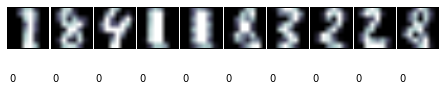

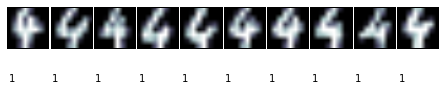

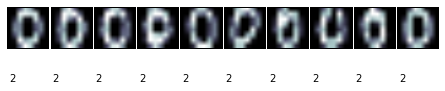

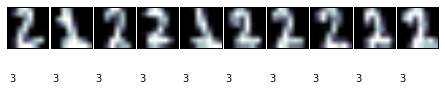

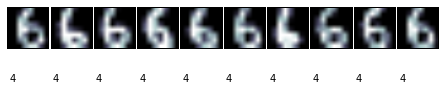

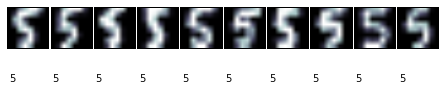

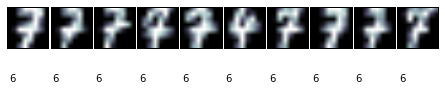

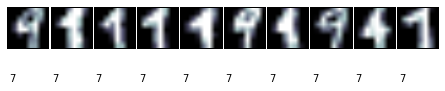

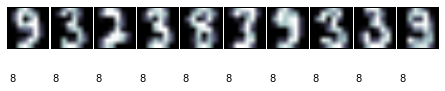

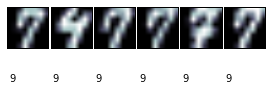

In [15]:
# 훈련 군집과 혼돈 매트릭스 출력한다
y_pred = gm.predict(X_test)
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
for i in range(10):
     print_cluster(images_test, y_pred, i)
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

예측한다!


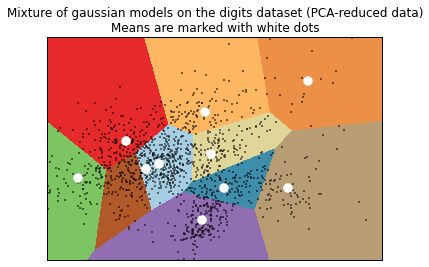

In [16]:
pl=plt
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
h = .01     # mesh [x_min, m_max]x[y_min, y_max]내의 점

# 결정 경계를 그린다. 각 영역을 색을 부여한다
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(reduced_X_train)
#print np.c_[xx.ravel(),yy.ravel()]
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
# 결과를 색으로 출력한다
Z = Z.reshape(xx.shape)
pl.figure(1)
pl.clf()
pl.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=pl.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

pl.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# 중심점을 흰 색으로 그린다
centroids = gm.means_

pl.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

pl.title('Mixture of gaussian models on the digits dataset (PCA-reduced data)\n'
         'Means are marked with white dots')
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())
pl.show()